Implement simple and multi-linear regression to predict profits for a food truck. Compare the performance of the model on linear and multi-linear regression.
By comparing the performance of these two regression models, you will gain insights into when and how to use simple and multi-linear regression techniques.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv(r'D:\kathan\python_codes\7th sem\ML lab\assignment3.csv')
data

,Population,Years in business,Profit
0,10000,5,10000
1,15000,6,12000
2,20000,6,13000
3,9000,5,12000


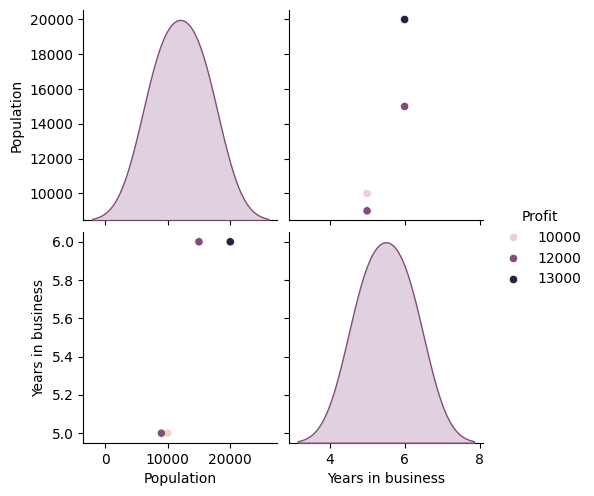

In [28]:
sns.pairplot(data, hue='Profit')

In [29]:
x = data.drop('Profit', axis =1)
y = data['Profit']

In [30]:
print("shape of x", x.shape)
print("shape of y", y.shape)


shape of x (4, 2)
shape of y (4,)


In [31]:


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [32]:
predictions = model.predict(x)
predictions

array([11057.69230769, 12211.53846154, 12788.46153846, 10942.30769231])

In [33]:
print(model.coef_)
print(model.intercept_)

[1.15384615e-01 5.76923077e+02]
7019.230769230771


In [42]:
x_simple = data[['Population']]
simple_model = LinearRegression()
simple_model.fit(x_simple, y)

simple_pred = simple_model.predict(x_simple)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Performance of Simple Linear Regression:")
print("R² Score:", r2_score(y, simple_pred))
print("MSE:", mean_squared_error(y, simple_pred))
print("MAE:", mean_absolute_error(y, simple_pred))
print("RMSE:", mean_squared_error(y, simple_pred, squared=False))


Performance of Simple Linear Regression:
R² Score: 0.5034898477157356
MSE: 476649.7461928938
MAE: 461.92893401015283
RMSE: 690.3982518756068


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Implementing simple linear regression

In [35]:
x_simple = data[['Population']]

In [36]:
simple_model = LinearRegression()
simple_model.fit(x_simple,y)

simple_pred = simple_model.predict(x_simple)


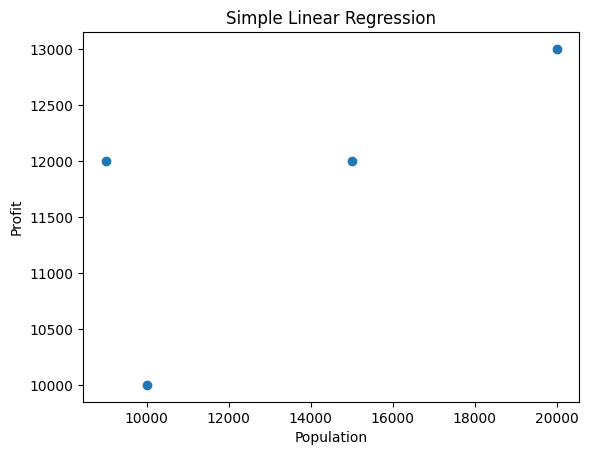

In [37]:
plt.scatter(x_simple, y, )
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Simple Linear Regression')
plt.show()

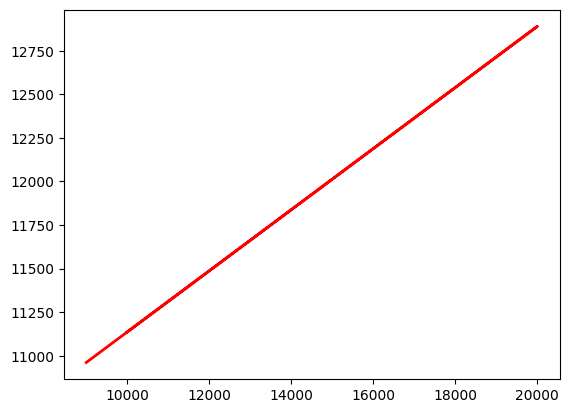

In [38]:
plt.plot(x_simple, simple_pred, color='red', linewidth=2)


In [39]:
X = data[['Population', 'Years in business']]
y = data['Profit']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
predictions = model.predict(X)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y, predictions))
print("MAE:", mean_absolute_error(y, predictions))
print("MSE:", mean_squared_error(y, predictions))
print("RMSE", mean_squared_error(y, predictions, squared=False))

Coefficients: [1.15384615e-01 5.76923077e+02]
Intercept: 7019.230769230771
R² Score: 0.5101214574898778
MAE: 634.6153846153848
MSE: 581730.7692307701
RMSE 762.7127698096906


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
new_input = pd.DataFrame({'Population': [12000], 'Years in business': [4]})
print("Predicted Profit:", model.predict(new_input)[0])


Predicted Profit: 10711.538461538461


Theta from Normal Equation: [9.38832487e+03 1.75126904e-01]
Theta from Gradient Descent: [-0.24692691  0.82738558]
MSE (Normal Equation): 476649.7461928933
MSE (Gradient Descent): 7788068.797740793


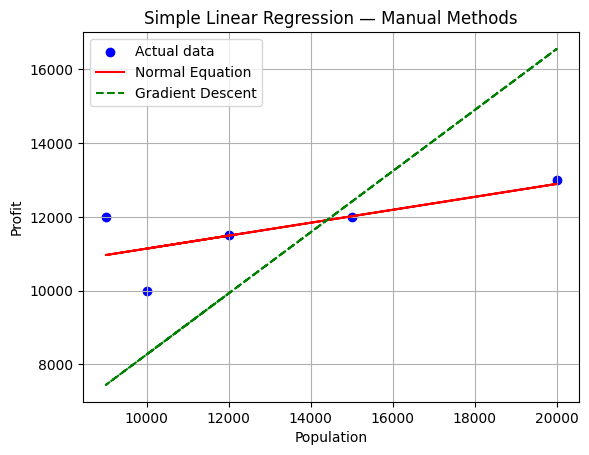

In [41]:
import numpy as np
import pandas as pd

# Example data
data = pd.DataFrame({
    'Population': [10000, 15000, 20000, 9000, 12000],
    'Profit': [10000, 12000, 13000, 12000, 11500]  # replace None with estimate
})

X = data[['Population']].values
y = data['Profit'].values.reshape(-1, 1)
m = len(y)

# Add bias term (intercept)
X_b = np.c_[np.ones((m, 1)), X]  # shape: (m, 2)


# Normal Equation: θ = (Xᵀ X)⁻¹ Xᵀ y
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta from Normal Equation:", theta_normal.ravel())

def gradient_descent(X, y, alpha=0.00000001, epochs=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # initialize θ0 and θ1
    for i in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
    return theta

theta_gd = gradient_descent(X_b, y, alpha=1e-9, epochs=10000)

print("Theta from Gradient Descent:", theta_gd.ravel())

# Predictions
y_pred_normal = X_b.dot(theta_normal)
y_pred_gd = X_b.dot(theta_gd)

from sklearn.metrics import mean_squared_error

print("MSE (Normal Equation):", mean_squared_error(y, y_pred_normal))
print("MSE (Gradient Descent):", mean_squared_error(y, y_pred_gd))

import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred_normal, color='red', label='Normal Equation')
plt.plot(X, y_pred_gd, color='green', linestyle='dashed', label='Gradient Descent')

plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Simple Linear Regression — Manual Methods')
plt.legend()
plt.grid(True)
plt.show()
